# Performance metrics without sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Confusion Matrix

In [ ]:
#used to get confusion matrix, just pass actual and predicted values columns
def getconfusionMatrix(y, y_pred):
    true_neg, true_pos, false_neg, false_pos = 0, 0, 0, 0
    
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            true_pos += 1
        elif y[i] == 1 and y_pred[i] == 0:
            false_neg += 1
        elif y[i] == 0 and y_pred[i] == 0:
            true_neg += 1
        elif y[i] == 0 and y_pred[i] == 1:
            false_pos += 1
    
    conf_matrix = np.zeros((2, 2))

    conf_matrix[0][0] = true_neg
    conf_matrix[0][1] = false_neg
    conf_matrix[1][0] = false_pos
    conf_matrix[1][1] = true_pos

    return conf_matrix


F1 score

In [ ]:
#used to compute F1 score, pass a confusion matrix
def getf1score(conf_matrix):
    precision = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
    recall = conf_matrix[1][1] / (conf_matrix[0][1] + conf_matrix[1][1])

    f1_score = (2 * precision * recall) / (precision + recall)

    return f1_score

AUC

In [ ]:
def getAUC(dataframe):
    pos_neg_count = dataframe['y'].value_counts()
    total_pos = pos_neg_count[1]
    total_neg = pos_neg_count[0]
    tprs, fprs = [], []
    
    for prob in dataframe['proba']:
        threshold = prob
        dataframe['y_predicted'] = np.where(dataframe['proba'] >= threshold, 1.0, 0.0)

        confusion_matrix = getconfusionMatrix(dataframe['y'], dataframe['y_predicted'])
        tprs.append(confusion_matrix[1][1] / total_pos)
        fprs.append(confusion_matrix[1][0] / total_neg)

        dataframe.drop(columns=['y_predicted'])
    
    plt.plot(fprs, tprs)
    plt.title("ROC plot")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    return np.trapz(tprs, fprs)


Confusion matrix:
[[    0.     0.]
 [  100. 10000.]]

F1 score:
0.9950248756218906

AUC:
0.48829900000000004

Accuracy:
0.9900990099009901


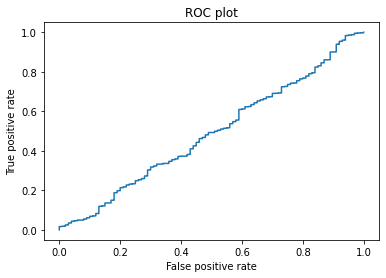

In [ ]:
data5a = pd.read_csv('5_a.csv')

# https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
data5a['y_predicted'] = np.where(data5a['proba'] >= 0.5, 1.0, 0.0)
data5a.head()

confusion_matrix = getconfusionMatrix(data5a['y'], data5a['y_predicted'])

print('Confusion matrix:')
print(confusion_matrix)

print('\nF1 score:')
print(getf1score(confusion_matrix))

print('\nAUC:')
data5a=data5a.sort_values(by='proba',ascending=False)

# https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
data5a.drop(columns=['y_predicted'])
print(getAUC(data5a))

print('\nAccuracy:')
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1])/data5a.shape[0]
print(accuracy)

Confusion matrix:
[[9761.   45.]
 [ 239.   55.]]

F1 score:
0.2791878172588833

AUC:
0.9377570000000001

Accuracy:
0.9718811881188119


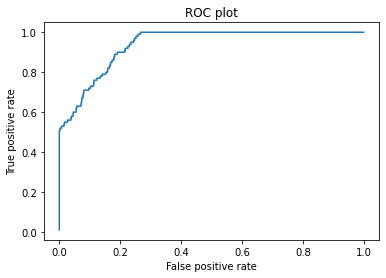

In [ ]:
data5b = pd.read_csv('5_b.csv')

# https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
data5b['y_predicted'] = np.where(data5b['proba'] >= 0.5, 1.0, 0.0)
data5b.head()

confusion_matrix = getconfusionMatrix(data5b['y'], data5b['y_predicted'])

print('Confusion matrix:')
print(confusion_matrix)

print('\nF1 score:')
print(getf1score(confusion_matrix))

print('\nAUC:')
data5b = data5b.sort_values(by='proba',ascending=False)

data5b.drop(columns=['y_predicted'])
print(getAUC(data5b))

print('\nAccuracy:')
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1])/data5b.shape[0]
print(accuracy)

In [ ]:
data5c = pd.read_csv('5_c.csv')

def computemetric(dataframe):
    pos_neg_count = dataframe['y'].value_counts()
    total_pos = pos_neg_count[1]
    total_neg = pos_neg_count[0]

    metric = {}
    
    for prob in dataframe['prob']:
        threshold = prob
        dataframe['y_predicted'] = np.where(dataframe['prob'] >= threshold, 1.0, 0.0)

        confusion_matrix = getconfusionMatrix(dataframe['y'], dataframe['y_predicted'])
        metric_value = (500 * confusion_matrix[0][1]) + (100 * confusion_matrix[1][0])

        metric[prob] = metric_value
        dataframe.drop(columns=['y_predicted'])

    return metric

data5c = data5c.sort_values(by='prob',ascending=False)
computed_metric = computemetric(data5c)
best_prob = min(computed_metric, key=computed_metric .get)

print("Minimum: " + str(best_prob))
    

Minimum: 0.2300390278970873


In [ ]:
data5d = pd.read_csv('5_d.csv')

def computeerrors(dataframe):
    errors_val = []
    abs_error_val = []
    # https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
    for index, row in dataframe.iterrows():
        errors_val.append(row['y'] - row['pred'])
        abs_error_val.append(abs(row['y'] - row['pred']))
    return errors_val, abs_error_val

# Compute Mean Square Error
def computemean_sqerror(dataframe):
    return sum(dataframe['error'] ** 2) / len(dataframe)

# Compute MAPE
def computeMAPE(dataframe):
    return sum(dataframe['abs_error']) / sum(dataframe['y'])

# Compute R^2
def computeRsquared(dataframe):
    ss_res = sum(dataframe['error'] ** 2)
    ss_total = sum((dataframe['y'] - dataframe['y'].mean()) ** 2)
    return 1 - (ss_res / ss_total)

errors, abs_errors = computeerrors(data5d)
data5d['error'] = errors
data5d['abs_error'] = abs_errors

print("Mean square error: " + str(computemean_sqerror(data5d)))
print("\nMAPE: " + str(computeMAPE(data5d)))
print("\nR^2: " + str(computeRsquared(data5d)))

Mean square error: 177.16569974554707

MAPE: 0.1291202994009687

R^2: 0.9563582786990964
